In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV as RandomCV

In [3]:
df=pd.read_csv(r'train.csv')

In [4]:
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [6]:
# No missing values for any variables

In [6]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


## Density plot for dependent variable

In [7]:
df['critical_temp'].describe()

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

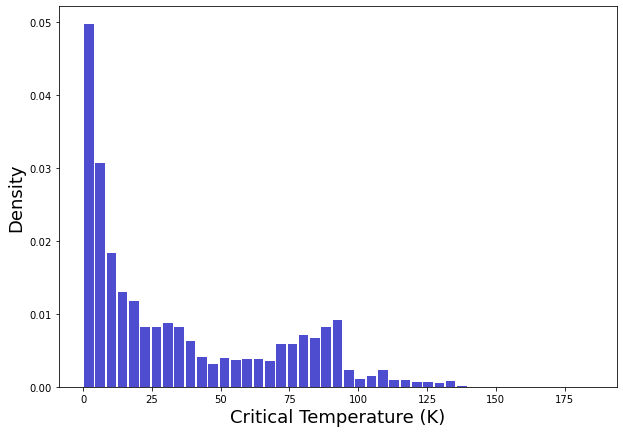

In [51]:
fig, ax = plt.subplots(figsize=(10, 7))
n, bins, patches = plt.hist(x=df['critical_temp'], density=True, bins='auto', color='#0300bb',
                            alpha=0.7, rwidth=0.85)

plt.xlabel('Critical Temperature (K)',size=18)
plt.ylabel('Density',size=18)
plt.axis("tight")
plt.savefig('Tc.png', bbox_inches='tight', dpi =300)

## Correlation plots

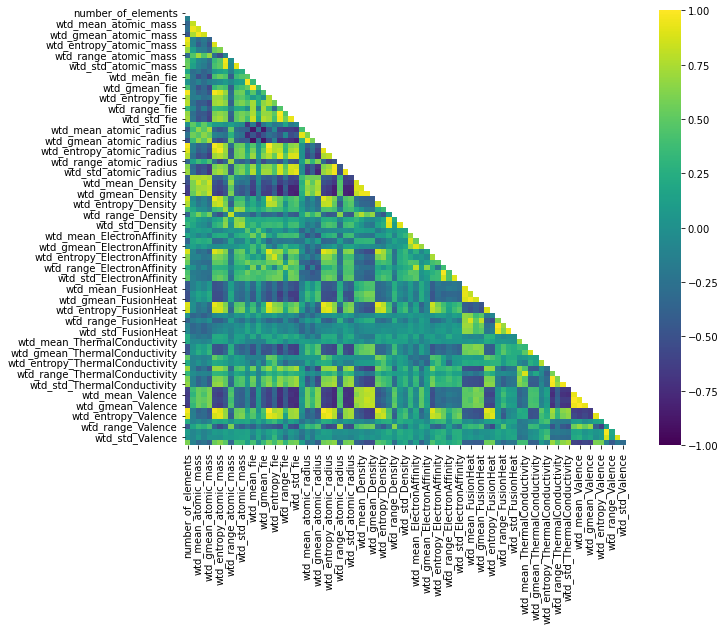

In [11]:
plt.figure(figsize=(10,8))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, cmap='viridis')

plt.savefig('corelation_all.png', bbox_inches='tight', dpi =300)

In [28]:
# Predictors are highly correlated, or multicollinearity exists among the predictors

In [13]:
corr_matrix = df.corr()
corr_matrix["critical_temp"].sort_values(ascending=False)

critical_temp                  1.000000
wtd_std_ThermalConductivity    0.721271
range_ThermalConductivity      0.687654
range_atomic_radius            0.653759
std_ThermalConductivity        0.653632
                                 ...   
gmean_Density                 -0.541684
gmean_Valence                 -0.573068
mean_Valence                  -0.600085
wtd_gmean_Valence             -0.615653
wtd_mean_Valence              -0.632401
Name: critical_temp, Length: 82, dtype: float64

## Feature selection by decision tree model (XGBoost)

In [14]:
x_vals=df.copy()

x_vals.drop('critical_temp',1,inplace=True)

y_vals=df['critical_temp']

C:\Users\md805971\AppData\Local\Temp\ipykernel_2288\3626095643.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_vals.drop('critical_temp',1,inplace=True)


In [15]:
#spliting data_set into test and train set 
X_train, X_test, Y_train, Y_test = train_test_split(x_vals, y_vals, test_size=0.3, random_state=0)

In [16]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=0)
model.fit(X_train, Y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [17]:
importances

,Attribute,Importance
67,range_ThermalConductivity,0.819625
64,wtd_gmean_ThermalConductivity,0.035536
27,range_atomic_radius,0.012872
43,gmean_ElectronAffinity,0.011931
9,std_atomic_mass,0.009741
...,...,...
13,gmean_fie,0.000317
58,wtd_range_FusionHeat,0.000253
47,range_ElectronAffinity,0.000231
1,mean_atomic_mass,0.000169


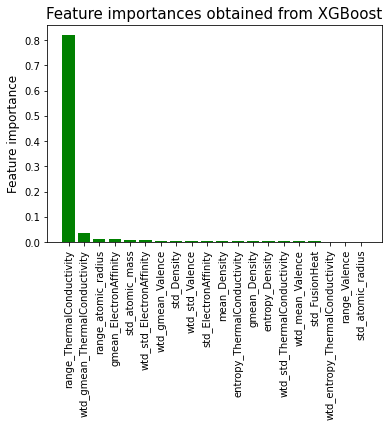

In [22]:
plt.bar(x=importances['Attribute'][0:20], height=importances['Importance'][0:20], color='g')
plt.title('Feature importances obtained from XGBoost', size=15)
plt.xticks(rotation='vertical')
plt.ylabel("Feature importance",size=12)
plt.savefig('feature importance.png', bbox_inches='tight', dpi =300)
plt.show()

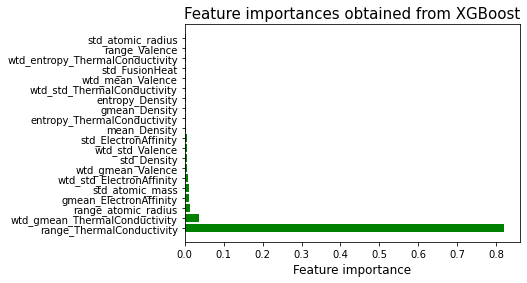

In [24]:
plt.barh(importances['Attribute'][0:20], importances['Importance'][0:20], color='g')
plt.title('Feature importances obtained from XGBoost', size=15)
#plt.xticks(rotation='vertical')
plt.xlabel("Feature importance",size=12)
plt.savefig('feature importance.png', bbox_inches='tight', dpi =300)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

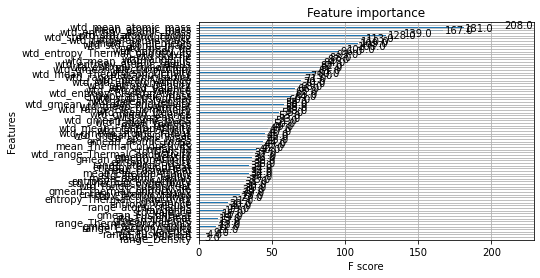

In [26]:
from xgboost import plot_importance
plot_importance(model)

In [27]:
max(model.feature_importances_)

0.81962466

In [28]:
min(model.feature_importances_)

6.260014e-05

### Pairplots based on top 10 features

In [29]:
importances_10 = importances.head(10)
feature_list=list(importances_10['Attribute'])
df_pplot=df.filter(feature_list)

In [30]:
feature_list

['range_ThermalConductivity',
 'wtd_gmean_ThermalConductivity',
 'range_atomic_radius',
 'gmean_ElectronAffinity',
 'std_atomic_mass',
 'wtd_std_ElectronAffinity',
 'wtd_gmean_Valence',
 'std_Density',
 'wtd_std_Valence',
 'std_ElectronAffinity']

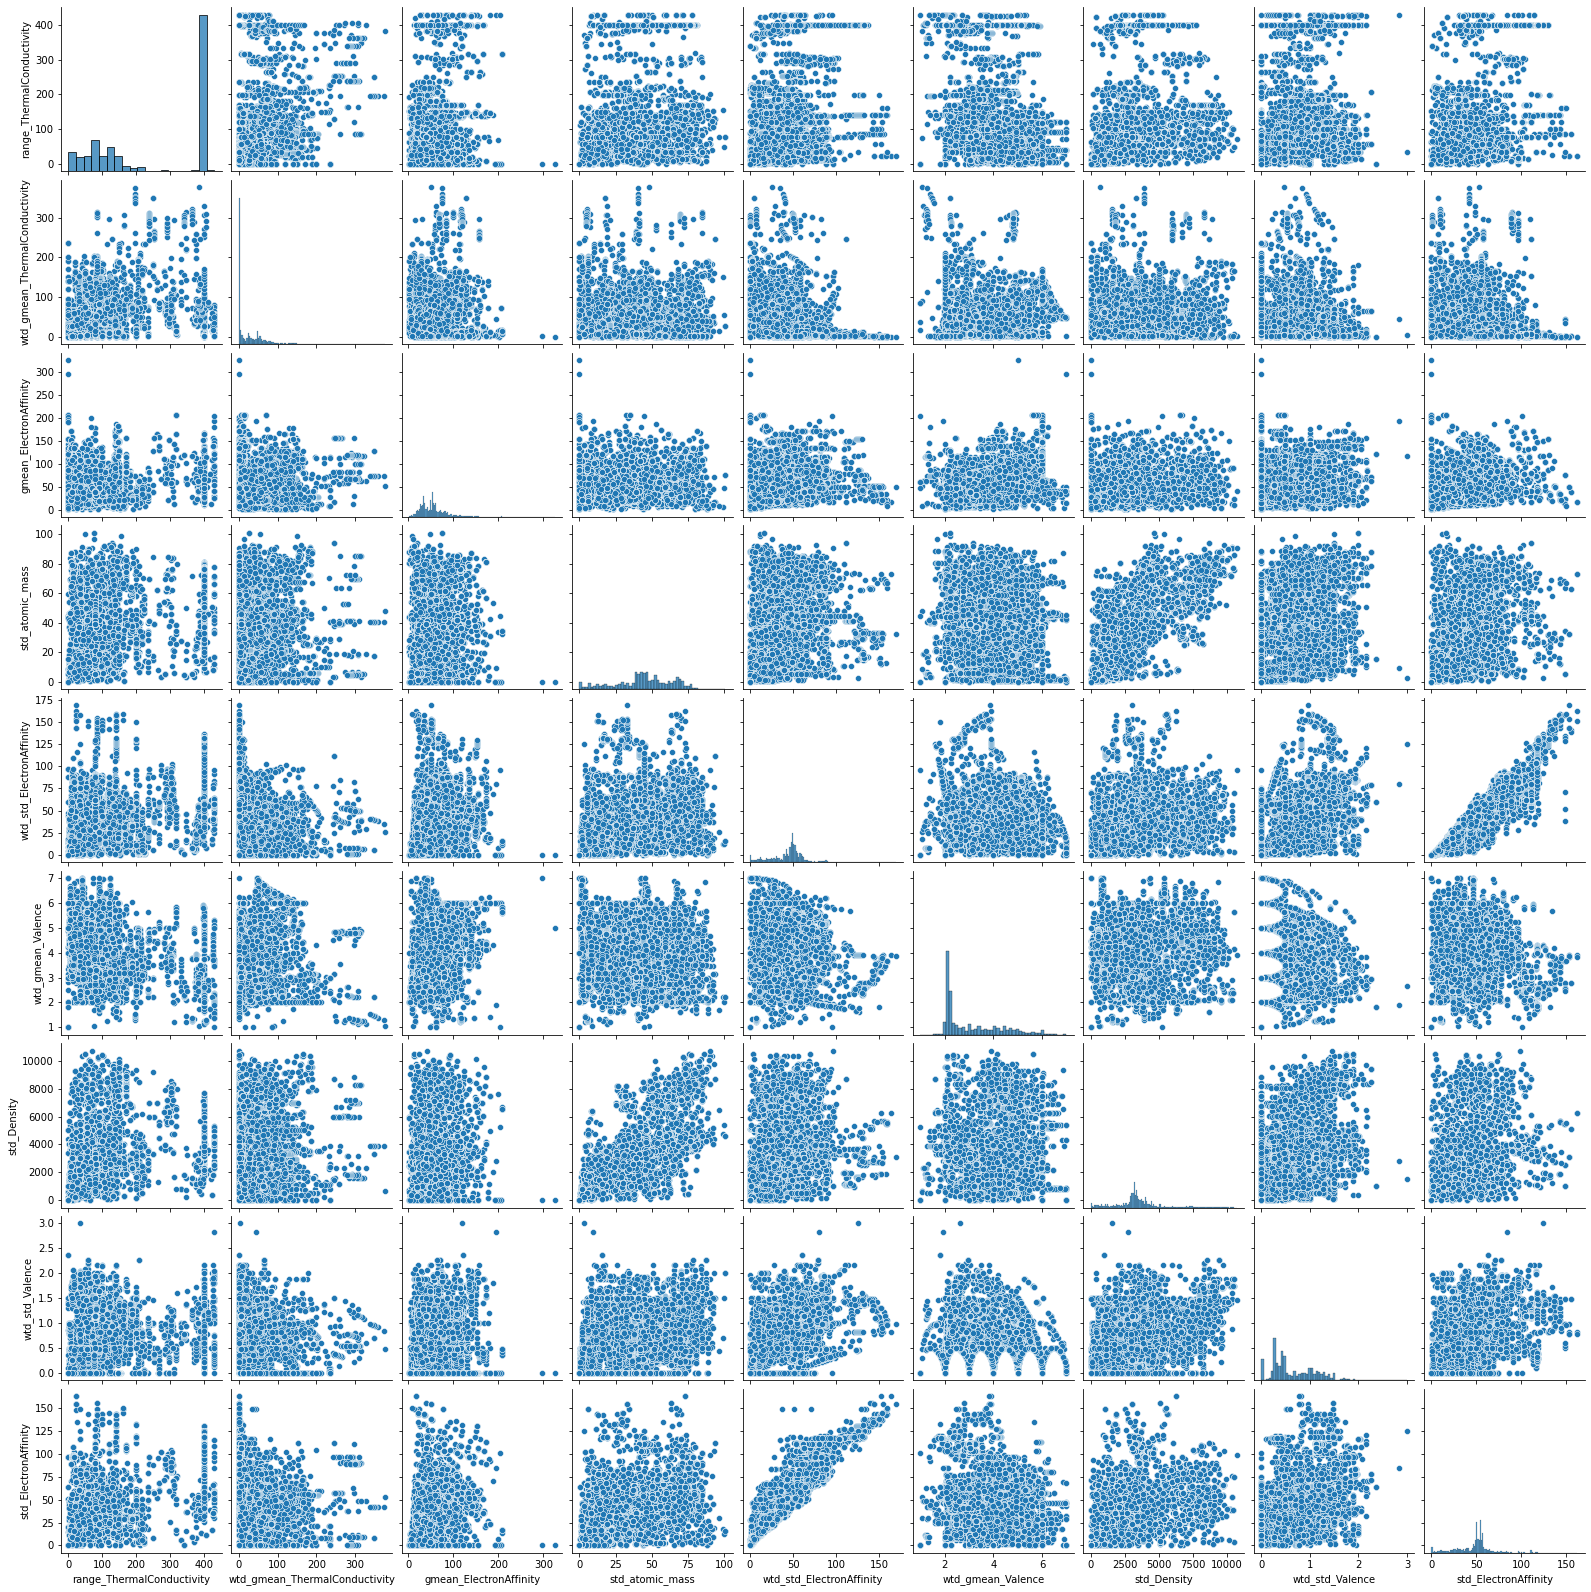

In [31]:
sns.pairplot(df_pplot.loc[:,df_pplot.dtypes == 'float64'])
plt.show()

### Pearson Corelation Matrix for the first 10 most important features

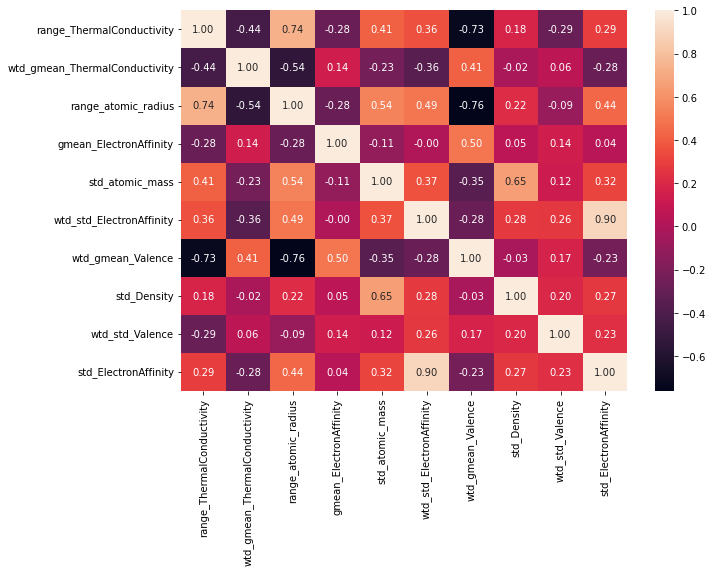

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df_pplot.corr(),annot=True, fmt=".2f")
plt.axis('tight')
plt.savefig('corelation_10.png')

plt.show()

## Filtering only the important features: threshold 0.001

In [33]:
importances_new=importances[importances['Importance']>0.001]

to_filter=list(importances_new['Attribute'])
x_vals_new=x_vals.filter(to_filter)

In [34]:
len(importances_new)

37

In [35]:
importances_new

,Attribute,Importance
67,range_ThermalConductivity,0.819625
64,wtd_gmean_ThermalConductivity,0.035536
27,range_atomic_radius,0.012872
43,gmean_ElectronAffinity,0.011931
9,std_atomic_mass,0.009741
50,wtd_std_ElectronAffinity,0.007254
74,wtd_gmean_Valence,0.005289
39,std_Density,0.005041
80,wtd_std_Valence,0.004733
49,std_ElectronAffinity,0.004584


### filtering all Highly correlated variables

In [36]:
# Create correlation matrix
corr_matrix_new = x_vals_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_new.where(np.triu(np.ones(corr_matrix_new.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]

In [37]:
to_drop

['wtd_std_ThermalConductivity',
 'wtd_mean_Valence',
 'std_atomic_radius',
 'range_Density',
 'std_Valence',
 'wtd_gmean_Density']

In [38]:
x_vals_new1 = x_vals_new.drop(['wtd_std_ThermalConductivity', 'wtd_mean_Valence','std_atomic_radius', 'range_Density', 'std_Valence', 'wtd_gmean_Density'], axis=1)

In [39]:
x_vals_new1

,range_ThermalConductivity,wtd_gmean_ThermalConductivity,range_atomic_radius,gmean_ElectronAffinity,std_atomic_mass,wtd_std_ElectronAffinity,wtd_gmean_Valence,std_Density,wtd_std_Valence,std_ElectronAffinity,...,wtd_entropy_Density,wtd_mean_ThermalConductivity,wtd_range_ElectronAffinity,wtd_range_fie,gmean_FusionHeat,mean_ElectronAffinity,wtd_std_FusionHeat,wtd_std_atomic_mass,gmean_ThermalConductivity,wtd_mean_Density
0,399.97342,0.621979,205,60.123179,51.968828,42.558396,2.219783,3306.162897,0.437059,51.433712,...,0.814598,61.015189,80.987143,735.985714,3.479475,81.837500,4.666920,53.622535,7.062488,2961.502286
1,429.97342,0.619735,205,69.833315,47.094633,41.667621,2.210679,3767.403176,0.468606,49.438167,...,0.914802,61.372331,81.207857,743.164286,4.403790,90.890000,4.603000,53.979870,16.064228,3021.016571
2,399.97342,0.619095,205,60.123179,51.968828,41.639878,2.232679,3306.162897,0.444697,51.433712,...,0.760305,60.943760,81.207857,743.164286,3.479475,81.837500,4.649635,53.656268,7.062488,2999.159429
3,399.97342,0.620535,205,60.123179,51.968828,42.102344,2.226222,3306.162897,0.440952,51.433712,...,0.788889,60.979474,81.097500,739.575000,3.479475,81.837500,4.658301,53.639405,7.062488,2980.330857
4,399.97342,0.624878,205,60.123179,51.968828,43.452059,2.206963,3306.162897,0.428809,51.433712,...,0.859811,61.086617,80.766429,728.807143,3.479475,81.837500,4.684014,53.588771,7.062488,2923.845143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,134.00000,95.001493,111,49.825259,65.764081,55.219027,3.519911,2981.637585,0.496904,43.467883,...,1.110551,111.537778,74.140000,427.546667,22.494622,63.825000,17.657417,43.202659,42.371302,4963.928889
21259,399.97342,1.577047,205,29.177546,69.232655,57.634544,2.038991,4506.895480,0.212959,58.434336,...,1.080432,108.680590,74.090000,659.771429,3.839585,60.484000,5.204855,50.148287,17.747413,2827.415190
21260,17.00000,57.038314,29,69.537903,6.756810,12.960000,4.781762,1726.500000,0.400000,16.200000,...,0.572700,57.400000,59.040000,370.180000,21.155614,71.400000,4.040000,5.405448,61.919302,9260.600000
21261,17.00000,58.781651,29,69.537903,6.756810,14.984781,4.665819,1726.500000,0.462493,16.200000,...,0.667210,59.270000,43.332000,208.799000,21.155614,71.400000,4.671182,6.249958,61.919302,9640.430000


## Boxplots

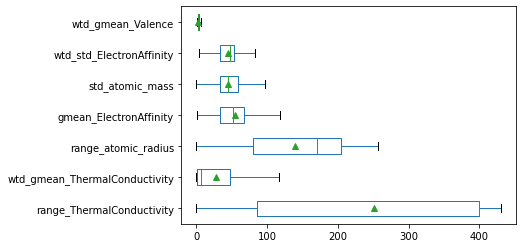

In [74]:
# Top 7 features

boxplot = x_vals_new1.boxplot(column=['range_ThermalConductivity', 'wtd_gmean_ThermalConductivity', 'range_atomic_radius','gmean_ElectronAffinity','std_atomic_mass','wtd_std_ElectronAffinity','wtd_gmean_Valence'], showfliers=False, vert=False, grid=False, showmeans=True)  
plt.savefig('boxplot.png',dpi=300,bbox_inches='tight')

### Linear Regression Model 

In [55]:
# with all 81 variables
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print(regr.score(X_test, Y_test))

0.7386576626075421


In [56]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)

print(rmse)

17.530720119486954


(-7.0, 147.0, -39.860636131726395, 148.56479219674887)

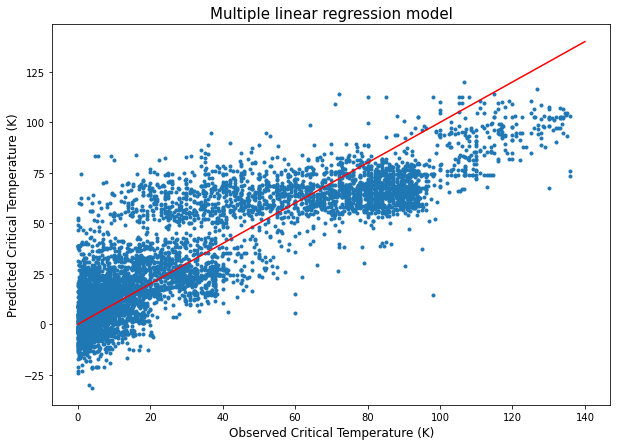

In [57]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(Y_test,y_pred,'.')
x=[0, 140]
y = [0, 140]
ax.plot(x,y,'r')
plt.title('Multiple linear regression model', size=15)
plt.xlabel("Observed Critical Temperature (K)",size=12)
plt.ylabel("Predicted Critical Temperature (K)",size=12)
plt.axis('tight')

In [58]:
# with 37 variables
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_vals_new, y_vals, test_size=0.3, random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(X_train1, Y_train1)

# Make predictions using the testing set
y_pred1 = regr.predict(X_test1)

print(regr.score(X_test1, Y_test1))

0.6889208997830711


In [60]:
from sklearn.metrics import mean_squared_error

rmse1 = mean_squared_error(Y_test1, y_pred1, squared=False)

print(rmse1)

19.126270241078277


(-7.0, 147.0, -60.12500598728164, 149.52976218987055)

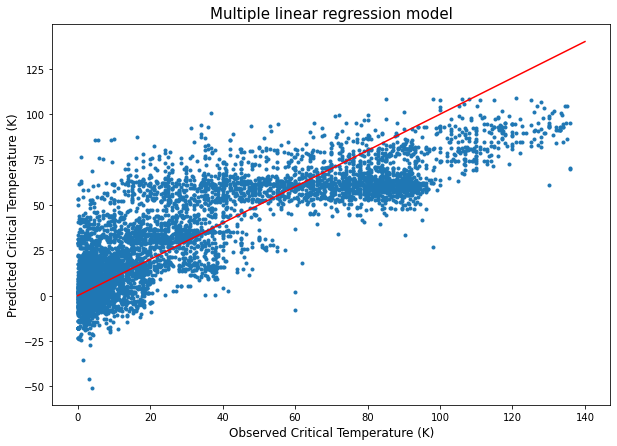

In [61]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(Y_test1,y_pred1,'.')
x=[0, 140]
y = [0, 140]
ax.plot(x,y,'r')
plt.title('Multiple linear regression model', size=15)
plt.xlabel("Observed Critical Temperature (K)",size=12)
plt.ylabel("Predicted Critical Temperature (K)",size=12)
plt.axis('tight')

In [62]:
# with 31 variables
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x_vals_new1, y_vals, test_size=0.3, random_state=0)

In [63]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(X_train2, Y_train2)

# Make predictions using the testing set
y_pred2 = regr.predict(X_test2)

#print(regr.score(X_test2, Y_test2))
print(r2_score(Y_test2, y_pred2))

0.6751515600873004


In [64]:
rmse_linreg = mean_squared_error(Y_test2, y_pred2, squared=False)

print(rmse_linreg)

19.544981487463257


(-7.0, 147.0, -49.15407527635378, 149.0073369179216)

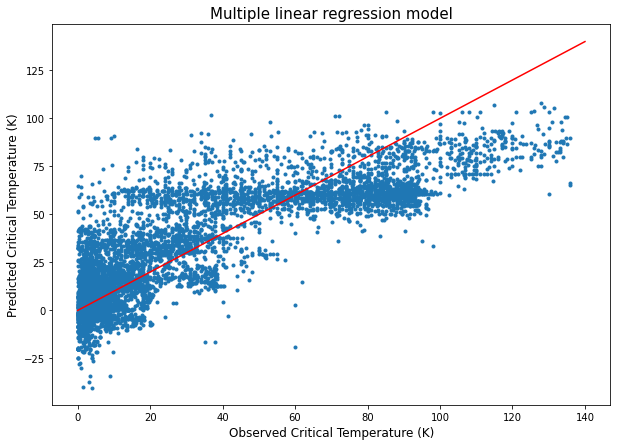

In [65]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(Y_test2,y_pred2,'.')
x=[0, 140]
y = [0, 140]
ax.plot(x,y,'r')
plt.title('Multiple linear regression model', size=15)
plt.xlabel("Observed Critical Temperature (K)",size=12)
plt.ylabel("Predicted Critical Temperature (K)",size=12)
plt.axis('tight')

## Statistical way to compute linear regression

In [66]:
# with all 81 variables
x_vals['Intercept']=1

In [67]:
# with all 81 variables
import statsmodels.api as sm

model = sm.OLS(y_vals,x_vals)

res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     733.8
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:30:59   Log-Likelihood:                -91100.
No. Observations:               21263   AIC:                         1.824e+05
Df Residuals:                   21181   BIC:                         1.830e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
number_of_

In [68]:
# with 37 variables
x_vals_new['Intercept']=1

In [69]:
import statsmodels.api as sm

model = sm.OLS(y_vals,x_vals_new)

res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     1268.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:31:02   Log-Likelihood:                -92908.
No. Observations:               21263   AIC:                         1.859e+05
Df Residuals:                   21225   BIC:                         1.862e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
range_Ther

In [70]:
# with 37 variables
x_vals_new1['Intercept']=1

In [71]:
import statsmodels.api as sm

model = sm.OLS(y_vals,x_vals_new1)

res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1435.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:31:07   Log-Likelihood:                -93299.
No. Observations:               21263   AIC:                         1.867e+05
Df Residuals:                   21231   BIC:                         1.869e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
range_Ther

In [72]:
def myprint(s):
    with open(r'modelsummary34.txt','w+') as f:
        print(s, file=f)

myprint(res.summary())

## Prediction with the Linear regression model

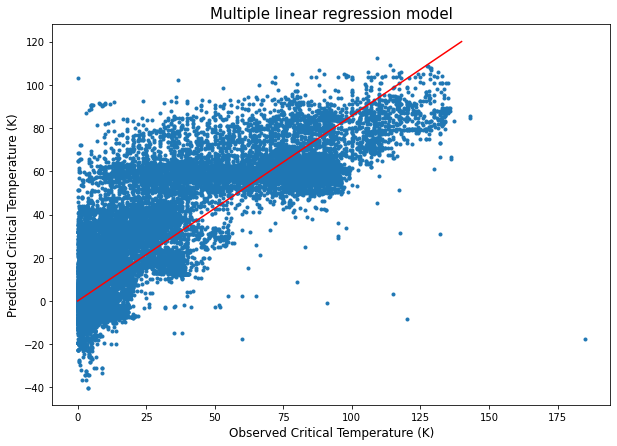

In [75]:
Y = res.predict(x_vals_new1)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(y_vals,Y,'.')
x=[0, 140]
y = [0, 120]
ax.plot(x,y,'r')
plt.title('Multiple linear regression model', size=15)
plt.xlabel("Observed Critical Temperature (K)",size=12)
plt.ylabel("Predicted Critical Temperature (K)",size=12)

plt.axis('tight')
plt.savefig('reg_plot.png',dpi=300,bbox_inches='tight')

## Ridge Regression Model (check Big Data codes from FSU)

In [49]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

In [76]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train2, Y_train2)
alpha = ridge.alpha_
#print("Best alpha :", alpha)

#print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train2, Y_train2)
alpha = ridge.alpha_
#print("Best alpha :", alpha)

#print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
#print("Ridge RMSE:", rmse_cv_test(ridge).mean())
#print("Intercept: ", ridge.intercept_)
#print("Coefficients: ", ridge.coef_)
#y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test2)

print("ridge_r2 =", r2_score(Y_test2, y_test_rdg))

rmse_ridge = mean_squared_error(Y_test2, y_test_rdg, squared=False)

print('ridge_rmse = ', rmse_ridge)

ridge_r2 = 0.6751316716411401
ridge_rmse =  19.545579787031183


## Lasso Regression

In [77]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train2, Y_train2)
alpha = lasso.alpha_
#print("Best alpha :", alpha)

#print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)

lasso.fit(X_train2, Y_train2)
alpha = lasso.alpha_
#print("Best alpha :", alpha)

#print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
#print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
#print("Intercept: ", lasso.intercept_)
#print("Coefficients: ", lasso.coef_)
#y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test2)

print("Lasso_r2 =", r2_score(Y_test2, y_test_las))

rmse_lasso = mean_squared_error(Y_test2, y_test_las, squared=False)

print('ridge_rmse = ', rmse_lasso)

Lasso_r2 = 0.6750827081866022
ridge_rmse =  19.54705266537378


## Random Forest Regression

In [79]:
rnf = RandomForestRegressor(random_state=0)
rnf.fit(X_train2, Y_train2)
rnf_train=rnf.score(X_train2, Y_train2)
rnf_test=rnf.score(X_test2, Y_test2)
#print("Accuracy on training set: {:.3f}".format(rnf.score(X_train2, Y_train2)))
#print("Accuracy on test set: {:.3f}".format(rnf.score(X_test2, Y_test2)))
Y_pred_ran=rnf.predict(X_test2)
rmse_rnf= sqrt(mean_squared_error(Y_test2, Y_pred_ran))
print("r2=", r2_score(Y_test2, Y_pred_ran))

print("RMSE=",rmse_rnf)

r2= 0.9176875501444237
RMSE= 9.838471560759837


## Gradient Boosting Regression

In [80]:
gbr = GradientBoostingRegressor(random_state=0)
gbr=gbr.fit(X_train2, Y_train2)
gbr_train=gbr.score(X_train2, Y_train2)
gbr_test=gbr.score(X_test2, Y_test2)
#print("Accuracy on training set: {:.3f}".format(gbr.score(X_train2, Y_train2)))
#print("Accuracy on test set: {:.3f}".format(gbr.score(X_test2, Y_test2)))
Y_pred=gbr.predict(X_test2)
rmse_gbr= sqrt(mean_squared_error(Y_test2, Y_pred))
print("r2=", r2_score(Y_test2, Y_pred))
print("RMSE=",rmse_gbr)

r2= 0.8551186180520411
RMSE= 13.052724170800778


## Knearest Neigbour Regressor

In [81]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5,weights='distance') 
model=knn.fit(X_train2, Y_train2)
Y_pred=model.predict(X_test2)
rmse_Knn= sqrt(mean_squared_error(Y_test2, Y_pred))
print("r2=", r2_score(Y_test2, Y_pred))
print("RMSE=",rmse_Knn)

r2= 0.8756457018254454
RMSE= 12.092755472881173


## XGBoost Regression

In [82]:
import xgboost as xg
xgb_r= XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model= xgb_r.fit(X_train2, Y_train2)
Y_pred=model.predict(X_test2)
rmse_XGBoost= sqrt(mean_squared_error(Y_test2, Y_pred))
print("r2=", r2_score(Y_test2, Y_pred))
print("RMSE=",rmse_XGBoost)

r2= 0.9151106693106474
RMSE= 9.991286796169158


## Winner is Random Forest Regression (High R_squared value and low RMSE)

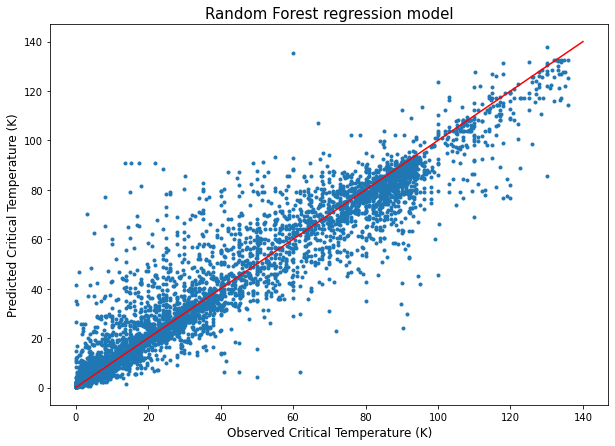

In [83]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(Y_test2,Y_pred_ran,'.')
x=[0, 140]
y = [0, 140]
ax.plot(x,y,'r')
plt.title('Random Forest regression model', size=15)
plt.xlabel("Observed Critical Temperature (K)",size=12)
plt.ylabel("Predicted Critical Temperature (K)",size=12)
plt.axis('tight')
plt.savefig('KNN_plot.png',dpi=300,bbox_inches='tight')

### Model Comparison

In [84]:
 RMSE=[rmse_linreg,rmse_ridge,rmse_lasso, rmse_rnf,rmse_gbr,rmse_Knn,rmse_XGBoost]
RMSE

[19.544981487463257,
 19.545579787031183,
 19.54705266537378,
 9.838471560759837,
 13.052724170800778,
 12.092755472881173,
 9.991286796169158]

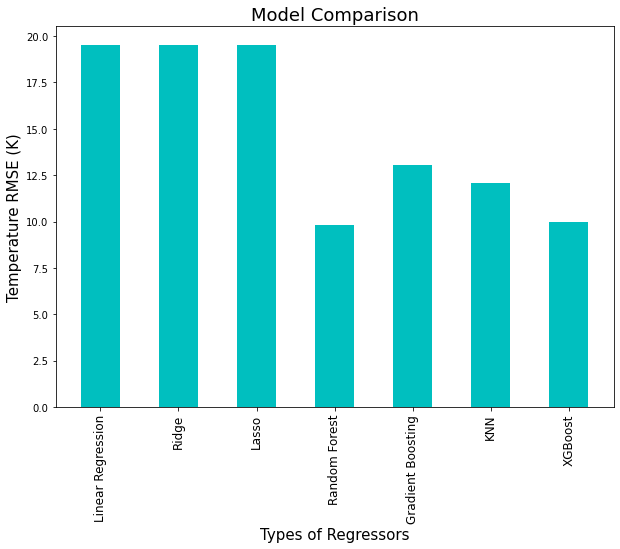

In [90]:
algorithm_type = [1,2,3,4,5,6,7]
LABELS = ["Linear Regression", "Ridge", "Lasso","Random Forest","Gradient Boosting","KNN","XGBoost"]
fig, ax = plt.subplots(figsize=(10, 7))
plt.bar(algorithm_type, RMSE, width=0.5,align='center',color='c')
plt.xticks(algorithm_type, LABELS,size=12,rotation='vertical')
plt.title("Model Comparison", size=18)
plt.xlabel("Types of Regressors",size=15)
plt.ylabel("Temperature RMSE (K)",size=15)
plt.savefig('model_comparison_plot.png',dpi=300,bbox_inches='tight')